# Text Processing

## Capturing Text Data

### Plain Text

In [1]:
import os

# Read in a plain text file
with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
    text = f.read()
    print(text)

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



### Tabular Data

In [2]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("data", "news.csv"))
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


### Online Resource

In [3]:
import requests
import json

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

{
    "contents": {
        "quotes": [
            {
                "date": "2018-04-03",
                "id": "wPkodOctkz8HYuyIo1e8FgeF",
                "permalink": "https://theysaidso.com/quote/wPkodOctkz8HYuyIo1e8FgeF/zig-ziglar-winning-is-not-everything-but-the-effort-to-win-is",
                "background": "https://theysaidso.com/img/bgs/man_on_the_mountain.jpg",
                "quote": "Winning is not everything, but the effort to win is.",
                "tags": [
                    "effort",
                    "inspire",
                    "winning"
                ],
                "author": "Zig Ziglar",
                "length": "52",
                "category": "inspire",
                "title": "Inspiring Quote of the day"
            }
        ],
        "copyright": "2017-19 theysaidso.com"
    },
    "success": {
        "total": 1
    }
}
Winning is not everything, but the effort to win is. 
-- Zig Ziglar


## Cleaning

In [4]:
import requests

# Fetch a web page
r = requests.get("https://www.udacity.com/courses/all")
print(r.text)

<!DOCTYPE html><html><head><meta charset="utf-8"><title>Udacity</title><base href="/"><meta name="viewport" content="width=device-width,initial-scale=1"><link rel="icon" type="image/x-icon" href="favicon.ico"><script src="assets/vendor/segment.js" async=""></script><link rel="preload" href="inline.d50d960eb33ceca3d3b7.bundle.js" as="script"><link rel="preload" href="polyfills.1326d82468645d27a0ff.bundle.js" as="script"><link rel="preload" href="main.40a8b249f0ac7948de2b.bundle.js" as="script"><link href="styles.4f181499f8401304f50e.bundle.css" rel="stylesheet"><style ng-transition="iridium-us">html[_ngcontent-c0]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c0], [_ngcontent-c0]:after, [_ngcontent-c0]:before{-webkit-box-sizing:inherit;box-sizing:inherit}a[_ngcontent-c0]{color:#9400d3}body[_ngcontent-c0]{color:#028bb1}[_nghost-c0]{display:block;position:relative}</style><style ng-transition="iridium-us">html[_ngcontent-c1]{-webkit-box-sizing:border-box;box-sizing:bord

In [5]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank

Udacityhtml[_ngcontent-c0]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c0], [_ngcontent-c0]:after, [_ngcontent-c0]:before{-webkit-box-sizing:inherit;box-sizing:inherit}a[_ngcontent-c0]{color:#9400d3}body[_ngcontent-c0]{color:#028bb1}[_nghost-c0]{display:block;position:relative}html[_ngcontent-c1]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c1], [_ngcontent-c1]:after, [_ngcontent-c1]:before{-webkit-box-sizing:inherit;box-sizing:inherit}.invisible[_ngcontent-c1]{visibility:hidden!important}.hide[_ngcontent-c1]{display:none!important}.show[_ngcontent-c1]{display:block!important}.sr-only[_ngcontent-c1]{height:1px;width:1px;overflow:hidden;position:absolute!important;clip:rect(1px,1px,1px,1px)}.hidden-xs-up[_ngcontent-c1]{display:none!important}@media (max-width:479px){.hidden-xs-down[_ngcontent-c1]{display:none!important}}@media (min-width:480px){.hidden-sm-up[_ngcontent-c1]{display:none!important}}@media (max-width:767px){.hidden-sm-down[_ngconten

In [6]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
print(soup.get_text())

Udacityhtml[_ngcontent-c0]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c0], [_ngcontent-c0]:after, [_ngcontent-c0]:before{-webkit-box-sizing:inherit;box-sizing:inherit}a[_ngcontent-c0]{color:#9400d3}body[_ngcontent-c0]{color:#028bb1}[_nghost-c0]{display:block;position:relative}html[_ngcontent-c1]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c1], [_ngcontent-c1]:after, [_ngcontent-c1]:before{-webkit-box-sizing:inherit;box-sizing:inherit}.invisible[_ngcontent-c1]{visibility:hidden!important}.hide[_ngcontent-c1]{display:none!important}.show[_ngcontent-c1]{display:block!important}.sr-only[_ngcontent-c1]{height:1px;width:1px;overflow:hidden;position:absolute!important;clip:rect(1px,1px,1px,1px)}.hidden-xs-up[_ngcontent-c1]{display:none!important}@media (max-width:479px){.hidden-xs-down[_ngcontent-c1]{display:none!important}}@media (min-width:480px){.hidden-sm-up[_ngcontent-c1]{display:none!important}}@media (max-width:767px){.hidden-sm-down[_ngconten

In [18]:
# Find all course summaries
divs = soup.find_all("div")# class_="course-summary-card")

classes = set()

for div in divs:
    classes |= set(div.attrs['class'])
    
classes

{'logo-wordmark'}

In [19]:
# Extract title
summaries[0].select_one("h3 a").get_text().strip()

IndexError: list index out of range

In [ ]:
# Extract description
summaries[0].select_one("div[data-course-short-summary]").get_text().strip()

In [ ]:
# Find all course summaries, extract title and description
courses = []
summaries = soup.find_all("div", class_="course-summary-card")
for summary in summaries:
    title = summary.select_one("h3 a").get_text().strip()
    description = summary.select_one("div[data-course-short-summary]").get_text().strip()
    courses.append((title, description))

print(len(courses), "course summaries found. Sample:")
print(courses[0][0])
print(courses[0][1])

## Normalization

### Case Normalization

In [20]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [21]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [22]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [23]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [4]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [24]:
from nltk.tokenize import word_tokenize
import nltk

#nltk.download()

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [ ]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

In [ ]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

In [ ]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

In [ ]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

## Part-of-Speech Tagging

In [25]:
from nltk import pos_tag

# Tag parts of speech (PoS)
sentence = word_tokenize("I always lie down to tell a lie.")
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

In [27]:
nltk.help.upenn_tagset('NN.*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


### Sentence Parsing

In [28]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


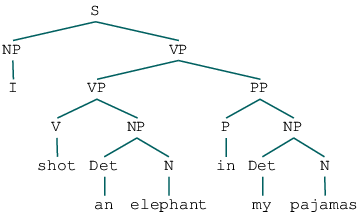

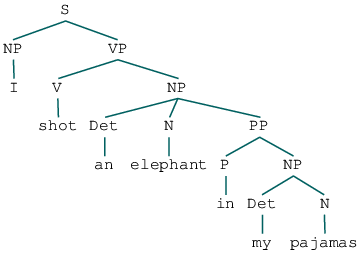

In [30]:
import IPython  # for displaying parse trees inline

# Visualize parse trees
for tree in parser.parse(sentence):
    IPython.display.display(tree)  # instead of tree.draw()

In [ ]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
tree = ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))
IPython.display.display(tree)

## Stemming & Lemmatization

### Stemming

In [31]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaiss', 'it', 'may', 'look', 'bore', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definit', 'watch', 'part', '2', 'it', 'will', 'chang', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'peopl', 'the', 'one', 'who', 'start', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### Lemmatization

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'one', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [33]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'bore', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'be', 'the', 'human', 'people', 'the', 'one', 'who', 'start', 'the', 'war', 'be', 'ai', 'a', 'bad', 'thing']
